## SRFP AQI data analysis and visualization for Lucknow

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [2]:
dfmod = pd.read_csv('./data/lucknow_mod.csv')
dfobs = pd.read_csv('./data/lucknow_obs.csv')

In [3]:
dfmod.head()

,date,hour,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev
0,2020-10-31,1:00:00,92.81,2.78,128.18,4.55
1,2020-10-31,2:00:00,75.64,1.83,99.86,2.85
2,2020-10-31,3:00:00,68.13,3.00,88.80,4.28
3,2020-10-31,4:00:00,63.71,2.78,82.63,3.82
4,2020-10-31,5:00:00,60.97,1.71,78.97,2.37


In [4]:
dfobs.head()

,date,hour,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
0,2020-10-31,1:00:00,114.00,42.08,279.13,132.02
1,2020-10-31,2:00:00,101.00,23.11,204.10,80.42
2,2020-10-31,3:00:00,91.40,27.57,197.93,43.16
3,2020-10-31,4:00:00,86.15,21.74,181.77,58.48
4,2020-10-31,5:00:00,87.65,30.85,213.77,53.07


In [5]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [6]:
dfobs.isna().sum()

date                 0
hour                 0
obs_PM2.5          261
obs_PM2.5_stdev    331
obs_PM10           261
obs_PM10_stdev     448
dtype: int64

In [7]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [8]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-10-31 01:00:00,114.00,42.08,279.13,132.02,2020-10-31 01:00:00
2020-10-31 02:00:00,101.00,23.11,204.10,80.42,2020-10-31 02:00:00
2020-10-31 03:00:00,91.40,27.57,197.93,43.16,2020-10-31 03:00:00
2020-10-31 04:00:00,86.15,21.74,181.77,58.48,2020-10-31 04:00:00
2020-10-31 05:00:00,87.65,30.85,213.77,53.07,2020-10-31 05:00:00


In [9]:
dfobs = dfobs.interpolate(method='time')

In [10]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

### Plot of time series with error bars

In [11]:
# Removing the october readings temporarily

dfmod = dfmod.iloc[23:, :]
dfobs = dfobs.iloc[23:, :]

In [12]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,182.12,73.35,391.00,101.39,2020-11-01 00:00:00
2020-11-01 01:00:00,188.90,75.35,395.93,104.71,2020-11-01 01:00:00
2020-11-01 02:00:00,200.42,76.12,397.17,98.20,2020-11-01 02:00:00
2020-11-01 03:00:00,169.33,47.34,364.70,126.15,2020-11-01 03:00:00
2020-11-01 04:00:00,224.00,106.10,377.43,78.98,2020-11-01 04:00:00


In [13]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

dfmod_jan

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,month
datetime,,,,,,
2021-01-01 00:00:00,89.06,2.84,121.55,3.88,2021-01-01 00:00:00,1
2021-01-01 01:00:00,88.22,1.86,120.28,2.69,2021-01-01 01:00:00,1
2021-01-01 02:00:00,86.67,1.50,118.05,2.17,2021-01-01 02:00:00,1
2021-01-01 03:00:00,84.30,1.02,114.61,1.44,2021-01-01 03:00:00,1
2021-01-01 04:00:00,84.41,1.04,114.21,1.42,2021-01-01 04:00:00,1
...,...,...,...,...,...,...
2021-01-31 19:00:00,78.75,1.00,86.93,1.15,2021-01-31 19:00:00,1
2021-01-31 20:00:00,81.12,2.01,89.57,2.24,2021-01-31 20:00:00,1
2021-01-31 21:00:00,82.98,1.53,91.61,1.70,2021-01-31 21:00:00,1


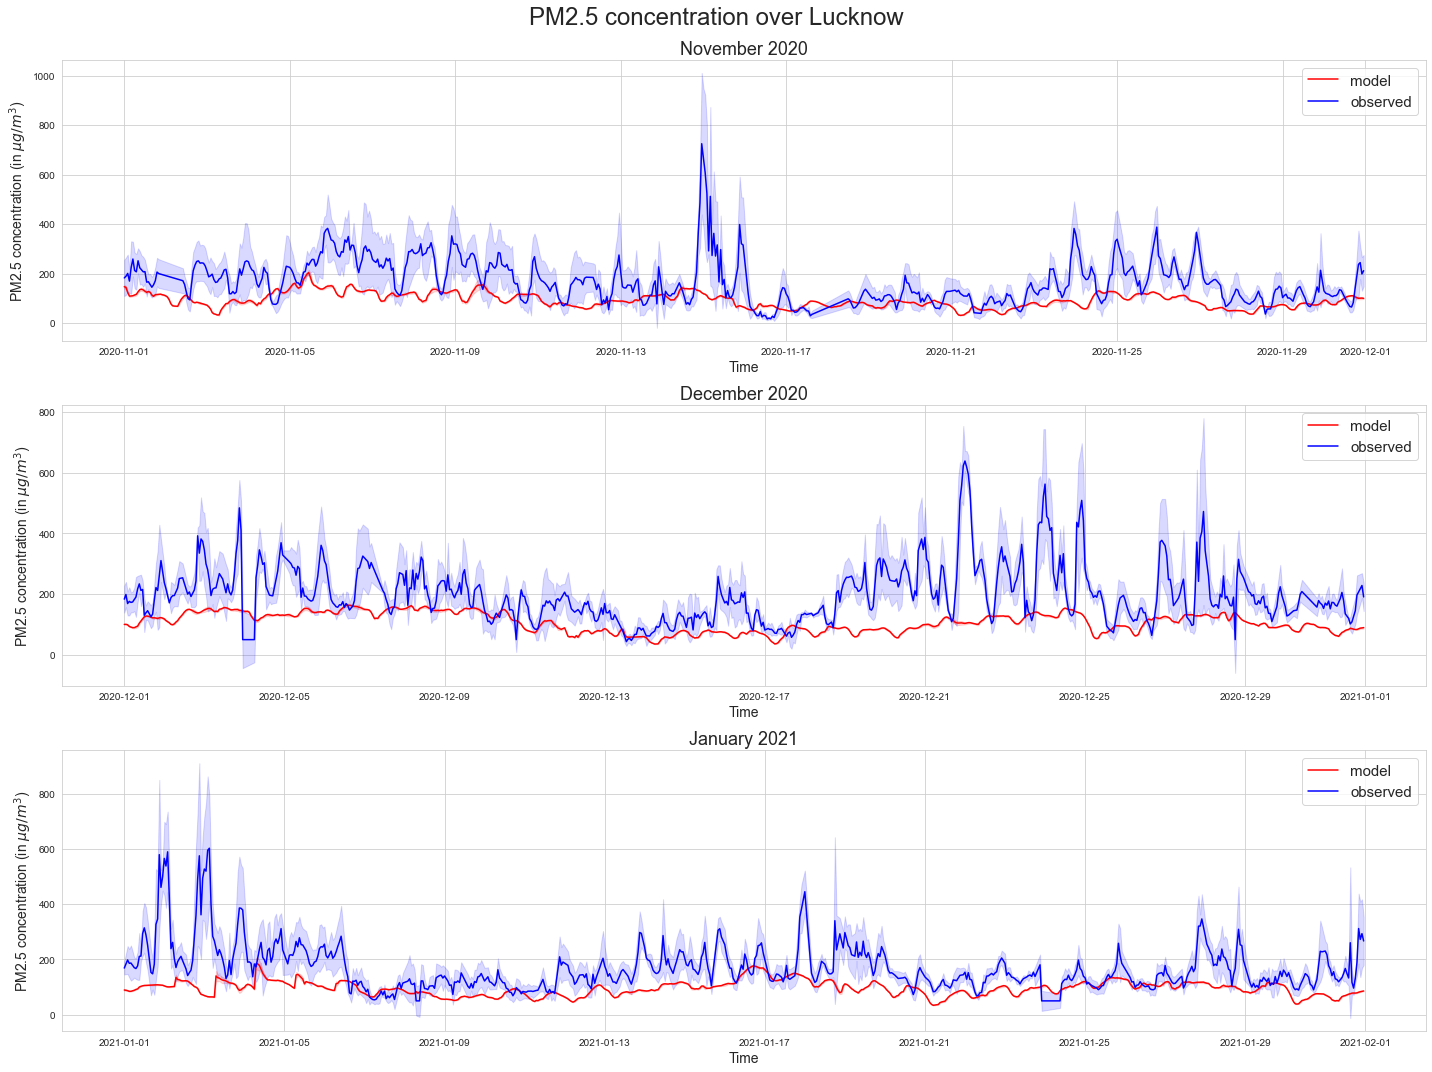

In [14]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM2.5'], yerr=dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM2.5'] + dfmod_nov['mod_PM2.5_stdev'], dfmod_nov['mod_PM2.5'] - dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM2.5'], yerr=dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM2.5'] + dfobs_nov['obs_PM2.5_stdev'], dfobs_nov['obs_PM2.5'] - dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_dec.index, dfmod_dec['mod_PM2.5'], yerr=dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM2.5'] + dfmod_dec['mod_PM2.5_stdev'], dfmod_dec['mod_PM2.5'] - dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_dec.index, dfobs_dec['obs_PM2.5'], yerr=dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM2.5'] + dfobs_dec['obs_PM2.5_stdev'], dfobs_dec['obs_PM2.5'] - dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_jan.index, dfmod_jan['mod_PM2.5'], yerr=dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM2.5'] + dfmod_jan['mod_PM2.5_stdev'], dfmod_jan['mod_PM2.5'] - dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_jan.index, dfobs_jan['obs_PM2.5'], yerr=dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM2.5'] + dfobs_jan['obs_PM2.5_stdev'], dfobs_jan['obs_PM2.5'] - dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err.png')

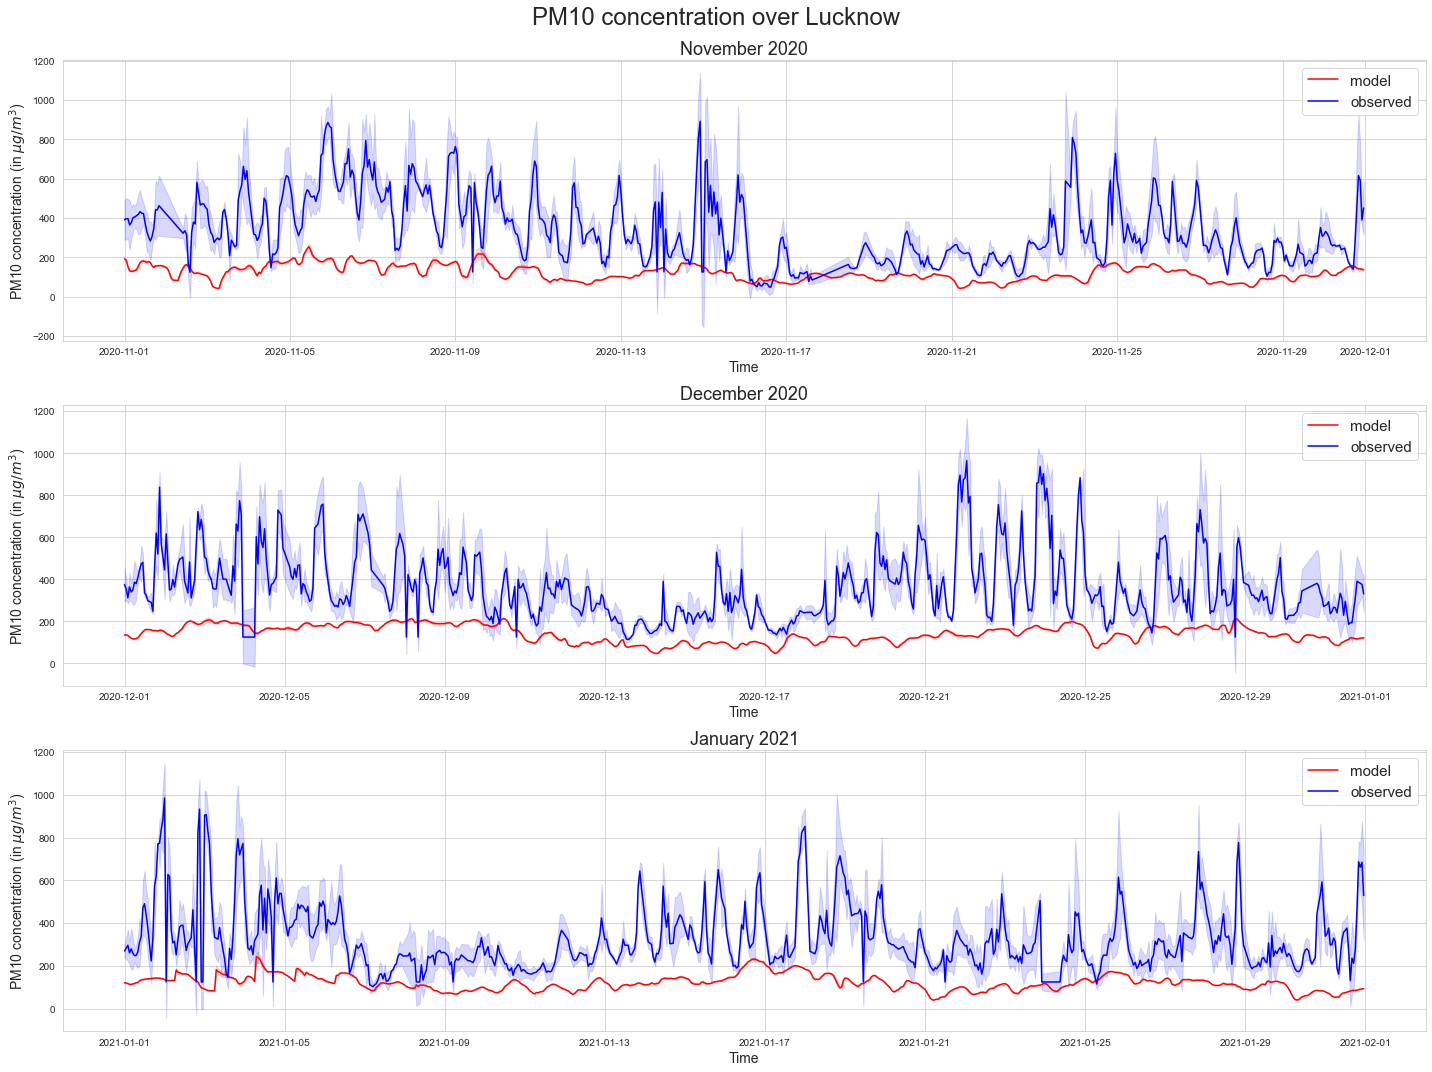

In [15]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM10'] + dfmod_nov['mod_PM10_stdev'], dfmod_nov['mod_PM10'] - dfmod_nov['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM10'] + dfobs_nov['obs_PM10_stdev'], dfobs_nov['obs_PM10'] - dfobs_nov['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM10'] + dfmod_dec['mod_PM10_stdev'], dfmod_dec['mod_PM10'] - dfmod_dec['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM10'] + dfobs_dec['obs_PM10_stdev'], dfobs_dec['obs_PM10'] - dfobs_dec['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM10'] + dfmod_jan['mod_PM10_stdev'], dfmod_jan['mod_PM10'] - dfmod_jan['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM10'] + dfobs_jan['obs_PM10_stdev'], dfobs_jan['obs_PM10'] - dfobs_jan['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err.png')

### Plot for diurnal variation

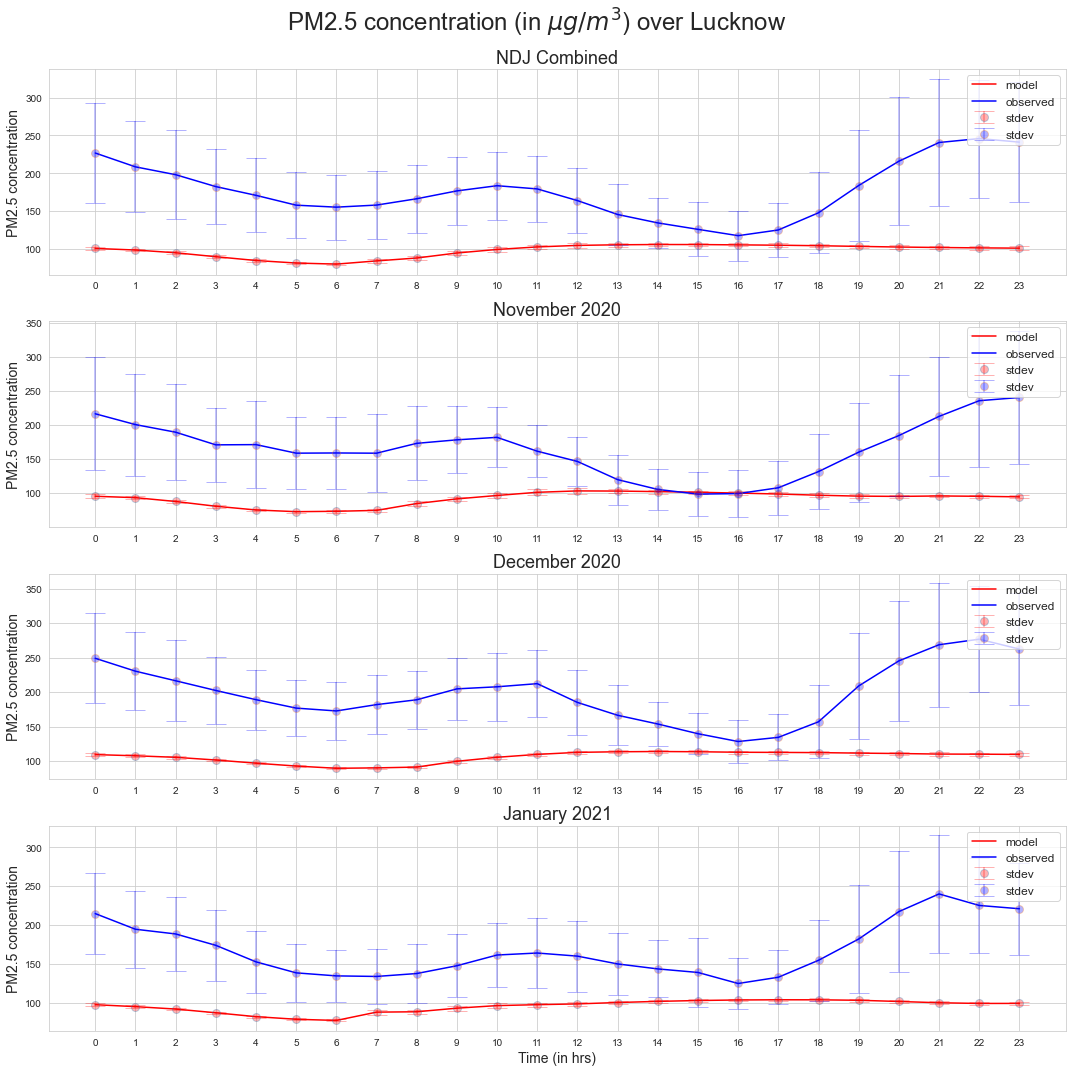

In [16]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png')

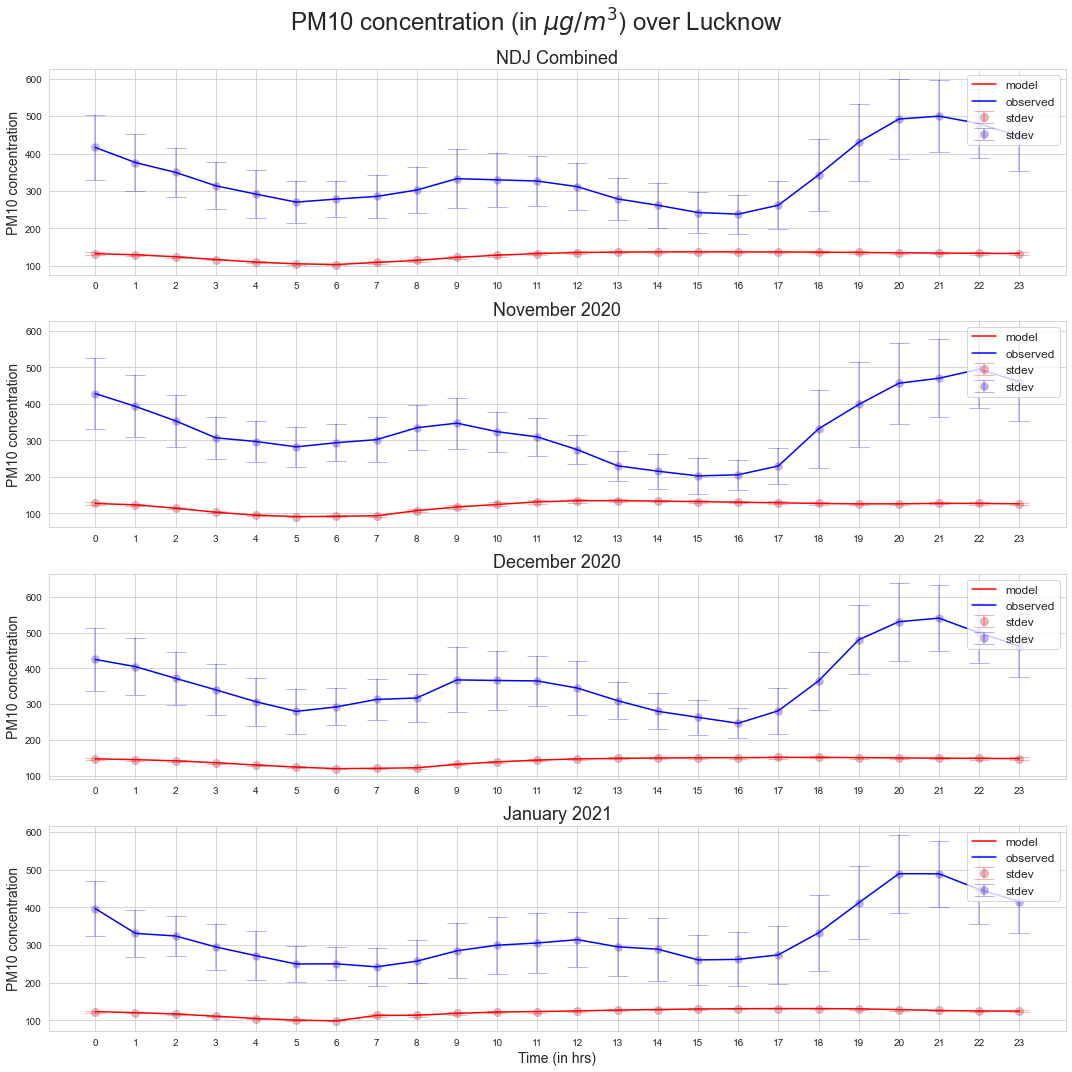

In [17]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration (in $\mu g/m^3$) over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm10.png')

### Take the running average for the data

In [18]:
# redifing the dataframes

dfmod = pd.read_csv('data/lucknow_mod.csv')
dfobs = pd.read_csv('data/lucknow_obs.csv')

In [19]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [20]:
dfobs = dfobs.interpolate(method='time')

dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [21]:
dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month
dfmod['time'] = dfmod.index.hour
dfobs['time'] = dfobs.index.hour

In [22]:
df = aqi_calc.get_aqi(dfmod, dfobs)

In [23]:
df.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,146.60,192.24,123.012917,4.369583,164.516250,5.900417,302.316933,142.580725,4,2,182.12,391.00,106.485000,43.581875,250.974792,95.835625,254.895050,200.974792,3,3
2020-11-01 01:00:00,143.77,185.33,125.136250,4.492917,166.897500,6.008333,303.949776,144.152350,4,2,188.90,395.93,109.605833,44.968125,255.841458,94.697708,265.287425,205.841458,3,3
2020-11-01 02:00:00,123.10,151.69,127.113750,4.687500,169.057083,6.238333,305.470474,145.577675,4,2,200.42,397.17,113.748333,47.176875,263.886042,95.438542,279.081950,213.886042,3,3
2020-11-01 03:00:00,108.64,130.70,128.801667,4.727083,170.802917,6.261250,306.768482,146.729925,4,2,169.33,364.70,116.995417,48.000625,270.834792,98.896458,289.894737,220.834792,3,3
2020-11-01 04:00:00,109.00,128.88,130.688750,4.732917,172.730000,6.231667,308.219649,148.001800,4,2,224.00,377.43,122.739167,51.515625,278.987292,99.750625,302.106419,228.987292,4,3


In [24]:
df.shape

(2208, 20)

### Critical PM2.5 and PM10 skill scores combine

In [25]:
score_calc.get_critical_score(df)

Key25 is :  ['c', 'd']
The list25 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
val25 is :  dict_values([267, 1941, 0, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([432, 1776, 0, 0])
Performance metrics or Skill score for Critical PM2.5 are:

A =  87.90760869565217
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  12.092391304347826
FOCN =  87.90760869565217
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Critical PM10 are:

A =  80.43478260869566
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  19.565217391304348
FOCN =  80.43478260869566
TSS =  0.0
Heidke =  0.0 



### Very unhealthy PM2.5 and PM10 skill scores combined

In [26]:
score_calc.get_veryunhealthy_score(df)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([484, 4, 1253, 467])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([1072, 1136, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  43.07065217391305
FAR =  0.819672131147541
POD =  27.86413356361543
CSI =  27.800114876507752
FOM =  72.13586643638456
FOH =  99.18032786885246
PON =  99.15074309978769
POFD =  0.8492569002123143
DFR =  72.84883720930233
FOCN =  27.151162790697676
TSS =  0.27014876663403115
Heidke =  0.13738419537229044 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  51.449275362318836
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  48.55072463768116
FOCN =  51.449275362318836
TSS =  0.0
Heidke =  0.0 



### Unhealthy PM2.5 and PM10 skill scores combined

In [27]:
score_calc.get_unhealthy_score(df)

Key25 is :  ['a', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'c', 'd', 'b'])
val25 is :  dict_values([1262, 810, 136, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([1700, 508, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  63.315217391304344
FAR =  0.0
POD =  60.907335907335906
CSI =  60.907335907335906
FOM =  39.092664092664094
FOH =  100.0
PON =  100.0
POFD =  0.0
DFR =  85.62367864693447
FOCN =  14.376321353065538
TSS =  0.609073359073359
Heidke =  0.16102496359788043 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  23.007246376811594
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  76.9927536231884
FOCN =  23.007246376811594
TSS =  0.0
Heidke =  0.0 



### Statistical performance combined

In [28]:
stat_calc.get_stat_performance(df, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -78.64785307216184
mean bias pm10 =  -211.41358723958317
mean bias aqi_pm2.5 =  -113.0108536384963
mean bias aqi_pm10 =  -185.05542386460823 

fractional bias is :
fractional bias pm2.5 =  -0.5727915489034087
fractional bias pm10 =  -0.9047116977068099
fractional bias aqi_pm2.5 =  -0.41130201651475196
fractional bias aqi_pm10 =  -0.8822389059623496 

Correlation coefficient is :
corr coeff pm2.5 =  0.6493965624250531
corr coeff pm10 =  0.7015493763895506
corr coeff aqi_pm2.5 =  0.6685323439228297
corr coeff aqi_pm10 =  0.6895508292564516 

RMSE is :
RMSE pm2.5 =  93.03057153629517
RMSE pm10 =  227.11418586005837
RMSE aqi_pm2.5 =  127.33915723242599
RMSE aqi_pm10 =  208.3698523916591 



### Doing the same critical PM2.5 and PM10 skill score for different winter months and also finding the statistical performance

#### Extracting the various months

In [29]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

### PM2.5 and PM10 scores for separate months

#### November

In [30]:
score_calc.get_critical_score(dfnov)

Key25 is :  ['c', 'd']
The list25 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
val25 is :  dict_values([70, 650, 0, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([121, 599, 0, 0])
Performance metrics or Skill score for Critical PM2.5 are:

A =  90.27777777777779
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  9.722222222222223
FOCN =  90.27777777777779
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Critical PM10 are:

A =  83.19444444444444
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  16.805555555555557
FOCN =  83.19444444444444
TSS =  0.0
Heidke =  0.0 



In [31]:
score_calc.get_veryunhealthy_score(dfnov)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([105, 4, 384, 227])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([354, 366, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  46.111111111111114
FAR =  3.669724770642202
POD =  21.472392638036812
CSI =  21.29817444219067
FOM =  78.52760736196319
FOH =  96.3302752293578
PON =  98.26839826839827
POFD =  1.7316017316017316
DFR =  62.84779050736498
FOCN =  37.15220949263502
TSS =  0.1974079090643508
Heidke =  0.13766599373992924 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  50.83333333333333
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  49.166666666666664
FOCN =  50.83333333333333
TSS =  0.0
Heidke =  0.0 



In [32]:
score_calc.get_unhealthy_score(dfnov)

Key25 is :  ['a', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'c', 'd', 'b'])
val25 is :  dict_values([344, 303, 73, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([493, 227, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  57.91666666666667
FAR =  0.0
POD =  53.16846986089645
CSI =  53.16846986089645
FOM =  46.831530139103556
FOH =  100.0
PON =  100.0
POFD =  0.0
DFR =  80.58510638297872
FOCN =  19.414893617021274
TSS =  0.5316846986089645
Heidke =  0.1871348515559795 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  31.52777777777778
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  68.47222222222223
FOCN =  31.52777777777778
TSS =  0.0
Heidke =  0.0 



In [33]:
stat_calc.get_stat_performance(dfnov, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -71.97252835648142
mean bias pm10 =  -209.79388599537003
mean bias aqi_pm2.5 =  -109.155452876805
mean bias aqi_pm10 =  -185.1693002401619 

fractional bias is :
fractional bias pm2.5 =  -0.5617562207665905
fractional bias pm10 =  -0.9325556565454797
fractional bias aqi_pm2.5 =  -0.4233848522381551
fractional bias aqi_pm10 =  -0.9078038741752431 

Correlation coefficient is :
corr coeff pm2.5 =  0.7419469837162979
corr coeff pm10 =  0.7658738341997979
corr coeff aqi_pm2.5 =  0.7286656061692877
corr coeff aqi_pm10 =  0.7522401863757489 

RMSE is :
RMSE pm2.5 =  86.18821542674023
RMSE pm10 =  232.8332492367131
RMSE aqi_pm2.5 =  123.92714269188136
RMSE aqi_pm10 =  217.4833780937439 



#### December

In [34]:
score_calc.get_critical_score(dfdec)

Key25 is :  ['c', 'd']
The list25 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
val25 is :  dict_values([145, 599, 0, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([203, 541, 0, 0])
Performance metrics or Skill score for Critical PM2.5 are:

A =  80.51075268817203
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  19.489247311827956
FOCN =  80.51075268817203
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Critical PM10 are:

A =  72.71505376344086
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  27.284946236559136
FOCN =  72.71505376344086
TSS =  0.0
Heidke =  0.0 



In [35]:
score_calc.get_veryunhealthy_score(dfdec)

Key25 is :  ['a', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'c', 'd', 'b'])
val25 is :  dict_values([294, 365, 85, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([427, 317, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  50.94086021505376
FAR =  0.0
POD =  44.613050075872536
CSI =  44.613050075872536
FOM =  55.38694992412747
FOH =  100.0
PON =  100.0
POFD =  0.0
DFR =  81.11111111111111
FOCN =  18.88888888888889
TSS =  0.44613050075872535
Heidke =  0.15543944765814519 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  42.60752688172043
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  57.392473118279575
FOCN =  42.60752688172043
TSS =  0.0
Heidke =  0.0 



In [36]:
score_calc.get_unhealthy_score(dfdec)

Key25 is :  ['a', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'c', 'd', 'b'])
val25 is :  dict_values([478, 235, 31, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([649, 95, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  68.41397849462365
FAR =  0.0
POD =  67.04067321178121
CSI =  67.04067321178121
FOM =  32.959326788218796
FOH =  100.0
PON =  100.0
POFD =  0.0
DFR =  88.34586466165413
FOCN =  11.654135338345863
TSS =  0.6704067321178121
Heidke =  0.14493632504548212 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  12.768817204301076
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  87.23118279569893
FOCN =  12.768817204301076
TSS =  0.0
Heidke =  0.0 



In [37]:
stat_calc.get_stat_performance(dfdec, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -91.55410067577661
mean bias pm10 =  -223.1442286439662
mean bias aqi_pm2.5 =  -115.64521559737162
mean bias aqi_pm10 =  -201.95980142155736 

fractional bias is :
fractional bias pm2.5 =  -0.6019398551358364
fractional bias pm10 =  -0.8799433402999605
fractional bias aqi_pm2.5 =  -0.3916634225033934
fractional bias aqi_pm10 =  -0.8856539078543765 

Correlation coefficient is :
corr coeff pm2.5 =  0.632221614502867
corr coeff pm10 =  0.6904043946303388
corr coeff aqi_pm2.5 =  0.6936775664390336
corr coeff aqi_pm10 =  0.6754016709769082 

RMSE is :
RMSE pm2.5 =  103.44356152072277
RMSE pm10 =  234.89100030299002
RMSE aqi_pm2.5 =  128.19156040050788
RMSE aqi_pm10 =  220.29136108393388 



#### January

In [38]:
score_calc.get_critical_score(dfjan)

Key25 is :  ['c', 'd']
The list25 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
val25 is :  dict_values([52, 692, 0, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([108, 636, 0, 0])
Performance metrics or Skill score for Critical PM2.5 are:

A =  93.01075268817203
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  6.989247311827956
FOCN =  93.01075268817203
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Critical PM10 are:

A =  85.48387096774194
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  14.516129032258066
FOCN =  85.48387096774194
TSS =  0.0
Heidke =  0.0 



In [39]:
score_calc.get_veryunhealthy_score(dfjan)

Key25 is :  ['a', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'c', 'd', 'b'])
val25 is :  dict_values([85, 504, 155, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([291, 453, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  32.25806451612903
FAR =  0.0
POD =  14.431239388794568
CSI =  14.431239388794568
FOM =  85.56876061120543
FOH =  100.0
PON =  100.0
POFD =  0.0
DFR =  76.4795144157815
FOCN =  23.520485584218513
TSS =  0.14431239388794567
Heidke =  0.06565734589834699 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  60.88709677419355
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  39.11290322580645
FOCN =  60.88709677419355
TSS =  0.0
Heidke =  0.0 



In [40]:
score_calc.get_unhealthy_score(dfjan)

Key25 is :  ['a', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'c', 'd', 'b'])
val25 is :  dict_values([440, 272, 32, 0])
Key10 is :  ['c', 'd']
The list10 from algorithm is :  dict_keys(['c', 'd', 'a', 'b'])
Val10 is :  dict_values([558, 186, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  63.44086021505376
FAR =  0.0
POD =  61.79775280898876
CSI =  61.79775280898876
FOM =  38.20224719101123
FOH =  100.0
PON =  100.0
POFD =  0.0
DFR =  89.47368421052632
FOCN =  10.526315789473683
TSS =  0.6179775280898876
Heidke =  0.12215435868961688 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  25.0
POD =  0.0
CSI =  0.0
FOM =  100.0
PON =  100.0
POFD =  0.0
DFR =  75.0
FOCN =  25.0
TSS =  0.0
Heidke =  0.0 



In [41]:
stat_calc.get_stat_performance(dfjan, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -72.20159712888287
mean bias pm10 =  -201.25039865218048
mean bias aqi_pm2.5 =  -114.10752467480593
mean bias aqi_pm10 =  -168.04084336357505 

fractional bias is :
fractional bias pm2.5 =  -0.5494651614569405
fractional bias pm10 =  -0.9056976932725721
fractional bias aqi_pm2.5 =  -0.4215877990798445
fractional bias aqi_pm10 =  -0.8526807080431124 

Correlation coefficient is :
corr coeff pm2.5 =  0.49009284398702646
corr coeff pm10 =  0.6042438432539605
corr coeff aqi_pm2.5 =  0.4979539406308874
corr coeff aqi_pm10 =  0.5914883899909802 

RMSE is :
RMSE pm2.5 =  88.29227283944272
RMSE pm10 =  213.17201999032451
RMSE aqi_pm2.5 =  129.71936793989298
RMSE aqi_pm10 =  185.8813518783522 



### Plots with running average instead

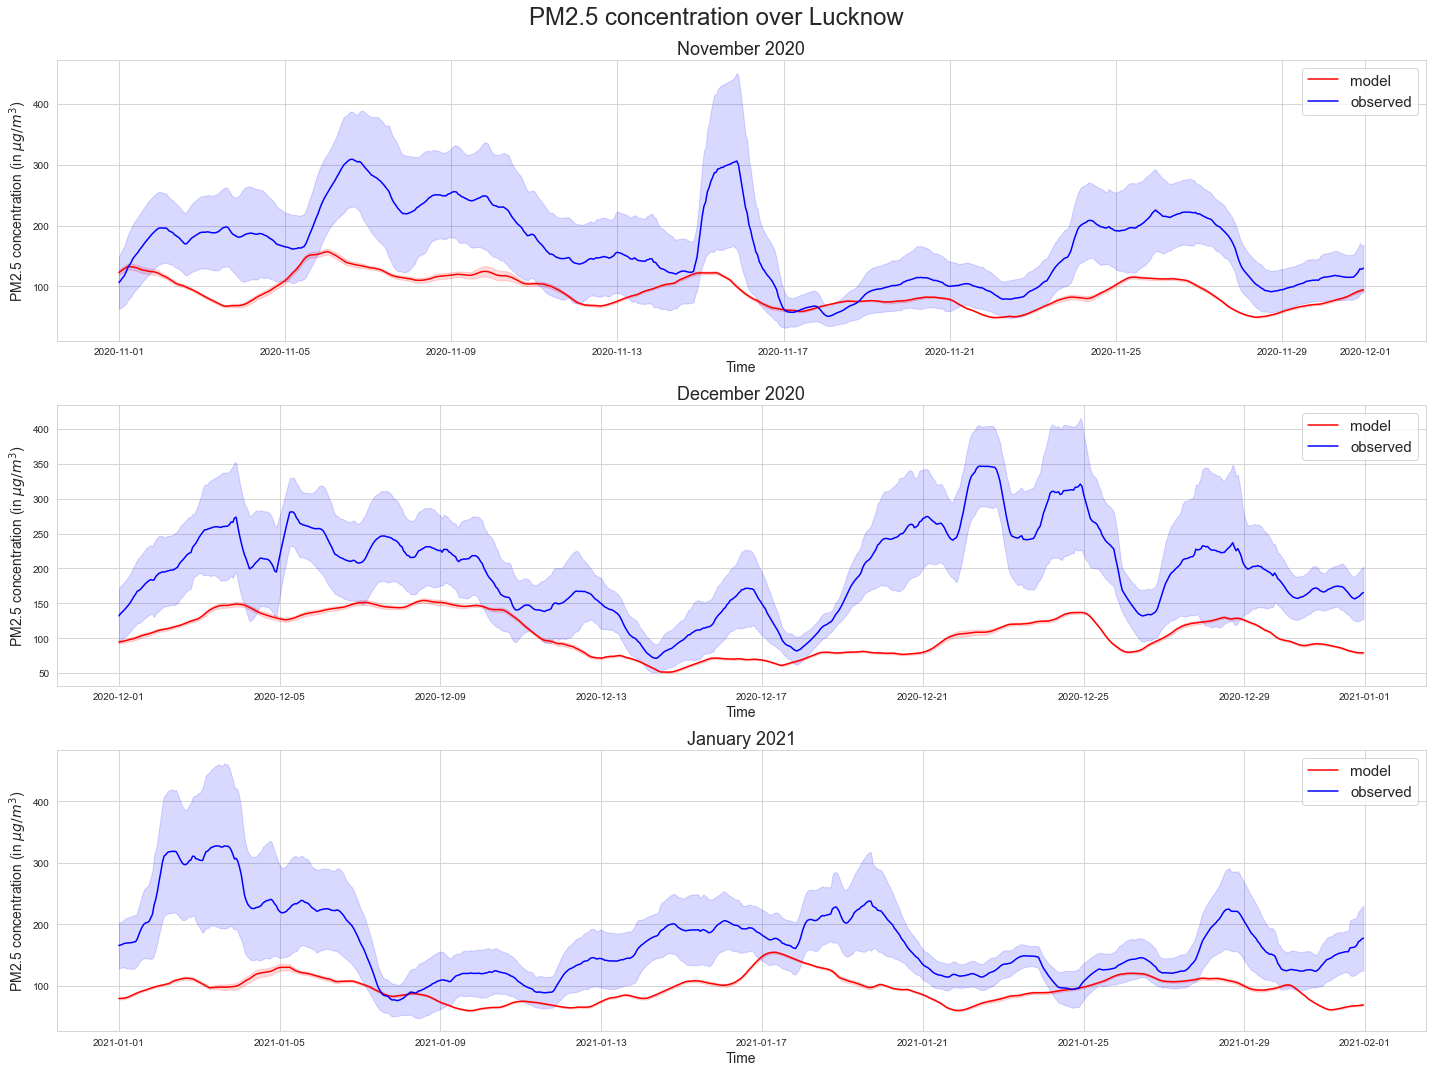

In [42]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_pm2'], yerr=dfmod_nov['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm2'] + dfnov['mod_pm2_stdev'], dfnov['mod_pm2'] - dfnov['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_pm2'], yerr=dfobs_nov['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm2'] + dfnov['obs_pm2_stdev'], dfnov['obs_pm2'] - dfnov['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfdec.index, dfdec['mod_pm2'], yerr=dfdec['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm2'] + dfdec['mod_pm2_stdev'], dfdec['mod_pm2'] - dfdec['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfdec.index, dfdec['obs_pm2'], yerr=dfdec['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm2'] + dfdec['obs_pm2_stdev'], dfdec['obs_pm2'] - dfdec['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfjan.index, dfjan['mod_pm2'], yerr=dfjan['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm2'] + dfjan['mod_pm2_stdev'], dfjan['mod_pm2'] - dfjan['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfjan.index, dfjan['obs_pm2'], yerr=dfjan['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm2'] + dfjan['obs_pm2_stdev'], dfjan['obs_pm2'] - dfjan['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err_running.png')

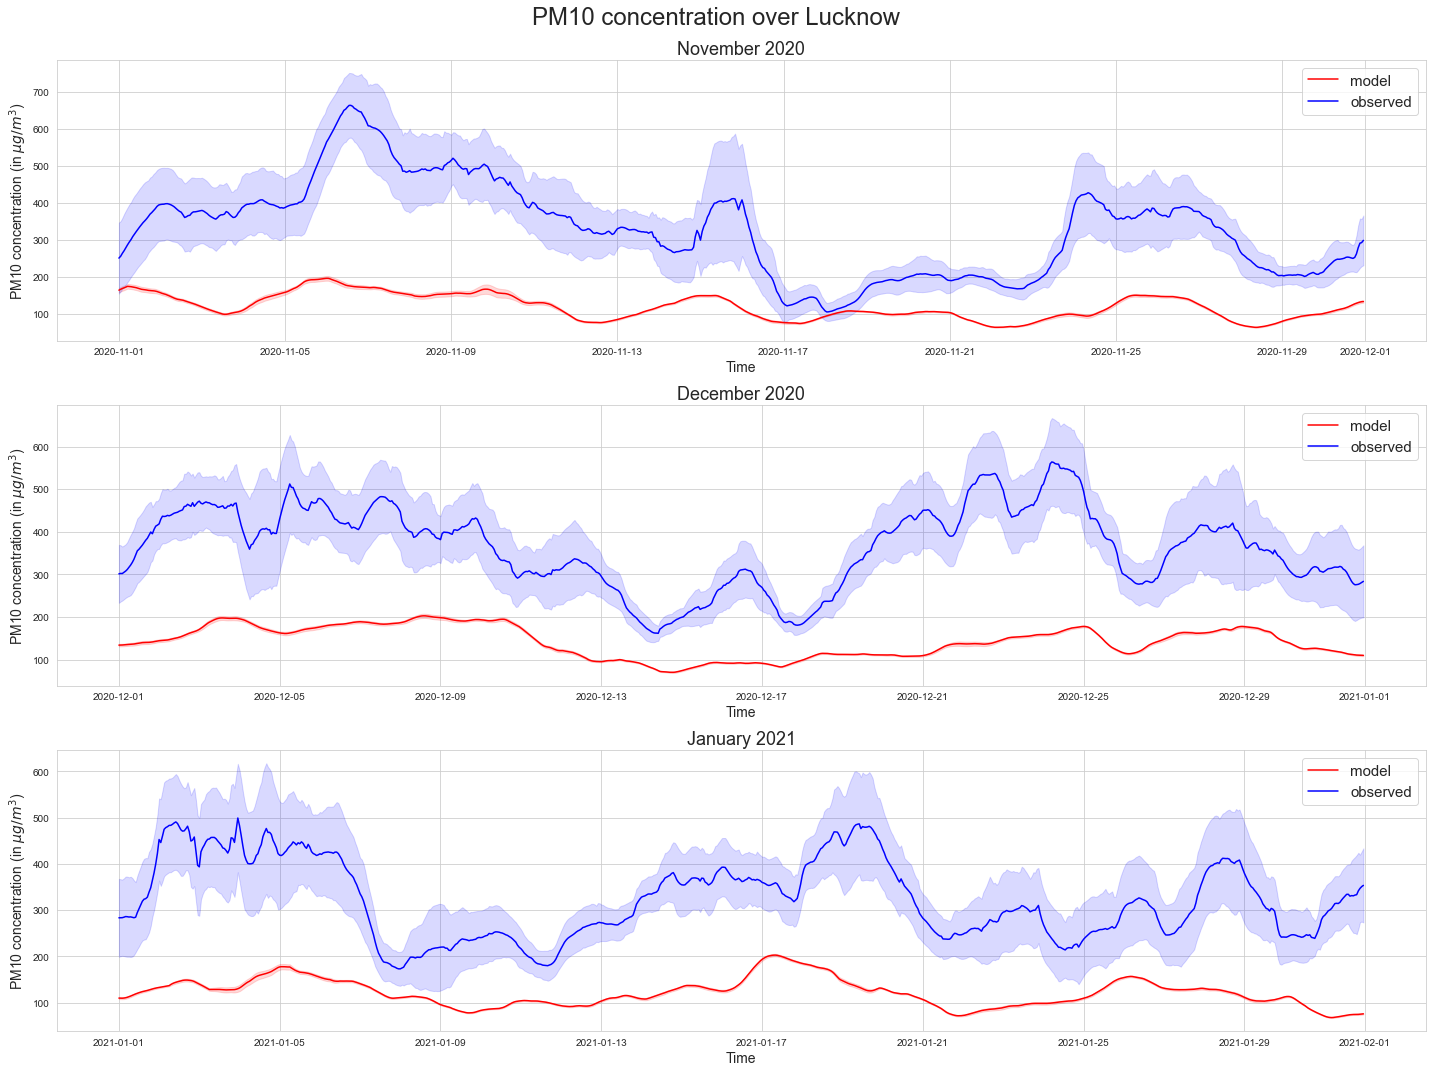

In [43]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm10'] + dfnov['mod_pm10_stdev'], dfnov['mod_pm10'] - dfnov['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm10'] + dfnov['obs_pm10_stdev'], dfnov['obs_pm10'] - dfnov['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm10'] + dfdec['mod_pm10_stdev'], dfdec['mod_pm10'] - dfdec['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm10'] + dfdec['obs_pm10_stdev'], dfdec['obs_pm10'] - dfdec['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm10'] + dfjan['mod_pm10_stdev'], dfjan['mod_pm10'] - dfjan['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm10'] + dfjan['obs_pm10_stdev'], dfjan['obs_pm10'] - dfjan['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err_running.png')

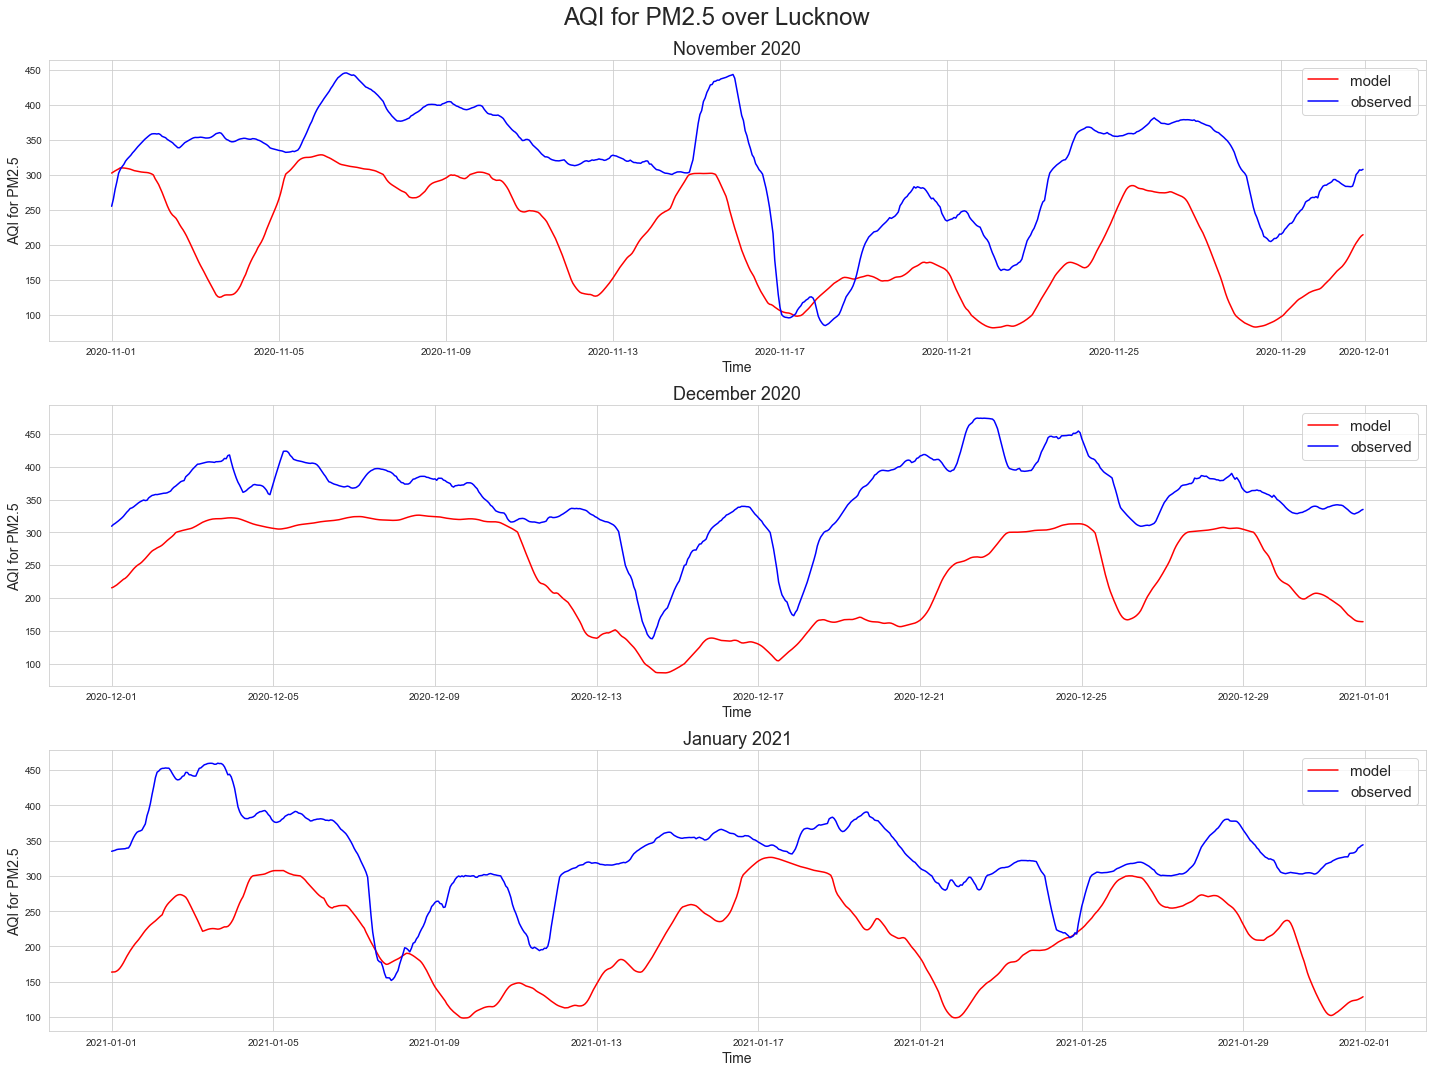

In [44]:
# Plot of AQI_PM2.5 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM2.5 over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm25_ts.png')

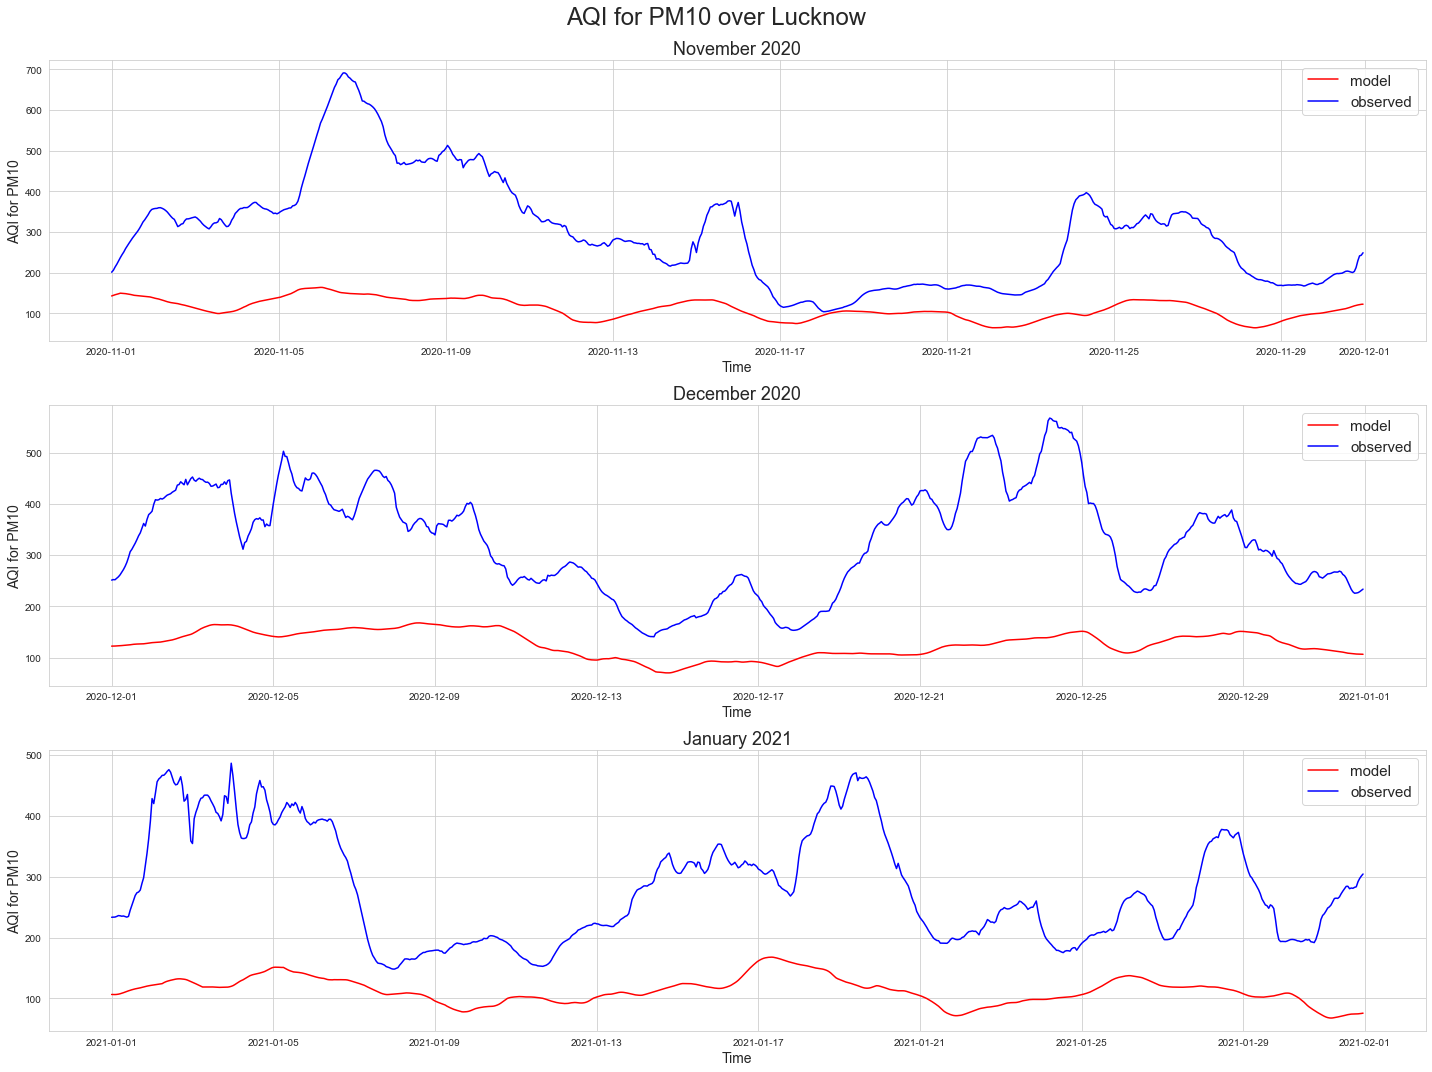

In [45]:
# Plot of AQI_PM10 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM10 over Lucknow', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm10_ts.png')